In [2]:
import os
import cobra
import scripts.io
import scripts.gen_model
import scripts.reaction_utils
import scripts.metabolite_utils
import math
import numpy as np
import importlib
import thermo_flux.io.load_sbml


from thermo_flux.tools.drg_tools import reaction_balance

/home/laurens/miniconda3/envs/thermo_pta/lib/python3.11/site-packages/enkie/compartment_parameters.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [6]:
INPUT_MODEL = "datafiles/model.xlsx"
INPUT_KEGGS = "datafiles/ecoli_kegg_id.csv"
INPUT_REED = "regression/reed.csv"
INPUT_INCHI = "regression/InChIs.csv"
INPUT_GAMS = "regression/model_Ecoli_from-gams.xlsx"
INPUT_EXP_DATA = "regression/allPhysioData_formatted_forGSM_20230831.csv"
INPUT_EXP_CONC = "regression/allConcRange_20230912.csv"
INPUT_METABOLOMICS = "regression/metabolomics-Kochanowski_20230925.csv"

MODEL_NAME = "ecoli"

CONDITIONS_TO_REGRESS = ["WT-Glc_I", "WT-Ace_I"]

INCLUDE_CO2 = True
INCLUDE_O2 = True
ALLOW_OTHER_EXCRETION = False
RELAX_EXP_FLUX_BOUNDS = 2.0

In [91]:
tmodel_glc = scripts.gen_model.gen_model(MODEL_NAME, INPUT_MODEL, INPUT_KEGGS, INPUT_REED, INPUT_INCHI, INPUT_GAMS, "", True, True)
tmodel_glc = scripts.gen_model.apply_physio_data(tmodel_glc, CONDITIONS_TO_REGRESS[0], INPUT_EXP_DATA, INPUT_EXP_CONC, INPUT_METABOLOMICS, INPUT_GAMS, RELAX_EXP_FLUX_BOUNDS, INCLUDE_CO2, INCLUDE_O2, allow_other_excr=False, output_log="", flux_limit=100)

blocked_p = scripts.reaction_utils.list_blocked_reactions(tmodel_glc, "core", "", 1, False)
print(len(blocked_p))

tmodel_glc.remove_reactions(blocked_p, remove_orphans=True)
scripts.metabolite_utils.remove_orphan_metabolites(tmodel_glc)
for rxn in tmodel_glc.reactions:
    reaction_balance(rxn, balance_charge=True, balance_mg=False)
tmodel_glc.update_thermo_info(fit_unknown_dfG0=True)

['Parameters', 'Exchange reactions', 'Reactions', 'Biomass Composition', 'Transmembrane reactions', 'Metabolites', 'references', 'Transmembrane_reactions_reed', 'Transmembrane reactions_Orth', 'Transmembrane reactions old', 'Sheet3', 'log', 'subsystems']
*** Reading data from Reactions ***
unknown metabolite '2dhglcn[c]' created
unknown metabolite 'nadh[c]' created
unknown metabolite 'glcn[c]' created
unknown metabolite 'nad[c]' created
unknown metabolite 'nadph[c]' created
unknown metabolite 'nadp[c]' created
unknown metabolite '2dhguln[c]' created
unknown metabolite 'idon-L[c]' created
unknown metabolite '3hcinnm[c]' created
unknown metabolite 'o2[c]' created
unknown metabolite 'dhcinnm[c]' created
unknown metabolite 'h2o[c]' created
unknown metabolite '3hpppn[c]' created
unknown metabolite 'dhpppn[c]' created
unknown metabolite 'phthr[c]' created
unknown metabolite '4hthr[c]' created
unknown metabolite 'pi[c]' created
unknown metabolite '5dglcn[c]' created
unknown metabolite 'ru5p-D

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


*** Updating metabolite information ***
2dhglcn_c NOTHING DONE!
nadh_c NOTHING DONE!
glcn_c NOTHING DONE!
nad_c NOTHING DONE!
nadph_c NOTHING DONE!
nadp_c NOTHING DONE!
2dhguln_c NOTHING DONE!
idon-L_c NOTHING DONE!
3hcinnm_c NOTHING DONE!
o2_c NOTHING DONE!
dhcinnm_c NOTHING DONE!
h2o_c NOTHING DONE!
3hpppn_c NOTHING DONE!
dhpppn_c NOTHING DONE!
phthr_c NOTHING DONE!
4hthr_c NOTHING DONE!
pi_c NOTHING DONE!
5dglcn_c NOTHING DONE!
ru5p-D_c NOTHING DONE!
ara5p_c NOTHING DONE!
ACP_c NOTHING DONE!
atp_c NOTHING DONE!
ttdca_c NOTHING DONE!
amp_c NOTHING DONE!
myrsACP_c NOTHING DONE!
ppi_c NOTHING DONE!
ttdcea_c NOTHING DONE!
tdeACP_c NOTHING DONE!
hdca_c NOTHING DONE!
palmACP_c NOTHING DONE!
hdcea_c NOTHING DONE!
hdeACP_c NOTHING DONE!
ocdcea_c NOTHING DONE!
octeACP_c NOTHING DONE!
dtdp4aaddg_c NOTHING DONE!
unagamu_c NOTHING DONE!
dtdp_c NOTHING DONE!
unagamuf_c NOTHING DONE!
arbt6p_c NOTHING DONE!
g6p_c NOTHING DONE!
hqn_c NOTHING DONE!
4abut_c NOTHING DONE!
akg_c NOTHING DONE!
glu-L_c N

In [92]:
tmodel_ace = scripts.gen_model.gen_model(MODEL_NAME, INPUT_MODEL, INPUT_KEGGS, INPUT_REED, INPUT_INCHI, INPUT_GAMS, "", True, True)
tmodel_ace = scripts.gen_model.apply_physio_data(tmodel_ace, CONDITIONS_TO_REGRESS[1], INPUT_EXP_DATA, INPUT_EXP_CONC, INPUT_METABOLOMICS, INPUT_GAMS, RELAX_EXP_FLUX_BOUNDS, INCLUDE_CO2, INCLUDE_O2, allow_other_excr=False, output_log="", flux_limit=100)

blocked_p = scripts.reaction_utils.list_blocked_reactions(tmodel_ace, "core", "", 1, False)
print(len(blocked_p))

tmodel_ace.remove_reactions(blocked_p, remove_orphans=True)
scripts.metabolite_utils.remove_orphan_metabolites(tmodel_ace)
for rxn in tmodel_ace.reactions:
    reaction_balance(rxn, balance_charge=True, balance_mg=False)
tmodel_ace.update_thermo_info(fit_unknown_dfG0=True)

['Parameters', 'Exchange reactions', 'Reactions', 'Biomass Composition', 'Transmembrane reactions', 'Metabolites', 'references', 'Transmembrane_reactions_reed', 'Transmembrane reactions_Orth', 'Transmembrane reactions old', 'Sheet3', 'log', 'subsystems']
*** Reading data from Reactions ***
unknown metabolite '2dhglcn[c]' created
unknown metabolite 'nadh[c]' created
unknown metabolite 'glcn[c]' created
unknown metabolite 'nad[c]' created
unknown metabolite 'nadph[c]' created
unknown metabolite 'nadp[c]' created
unknown metabolite '2dhguln[c]' created
unknown metabolite 'idon-L[c]' created
unknown metabolite '3hcinnm[c]' created
unknown metabolite 'o2[c]' created
unknown metabolite 'dhcinnm[c]' created
unknown metabolite 'h2o[c]' created
unknown metabolite '3hpppn[c]' created
unknown metabolite 'dhpppn[c]' created
unknown metabolite 'phthr[c]' created
unknown metabolite '4hthr[c]' created
unknown metabolite 'pi[c]' created
unknown metabolite '5dglcn[c]' created
unknown metabolite 'ru5p-D

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


2dhglcn_c NOTHING DONE!
nadh_c NOTHING DONE!
glcn_c NOTHING DONE!
nad_c NOTHING DONE!
nadph_c NOTHING DONE!
nadp_c NOTHING DONE!
2dhguln_c NOTHING DONE!
idon-L_c NOTHING DONE!
3hcinnm_c NOTHING DONE!
o2_c NOTHING DONE!
dhcinnm_c NOTHING DONE!
h2o_c NOTHING DONE!
3hpppn_c NOTHING DONE!
dhpppn_c NOTHING DONE!
phthr_c NOTHING DONE!
4hthr_c NOTHING DONE!
pi_c NOTHING DONE!
5dglcn_c NOTHING DONE!
ru5p-D_c NOTHING DONE!
ara5p_c NOTHING DONE!
ACP_c NOTHING DONE!
atp_c NOTHING DONE!
ttdca_c NOTHING DONE!
amp_c NOTHING DONE!
myrsACP_c NOTHING DONE!
ppi_c NOTHING DONE!
ttdcea_c NOTHING DONE!
tdeACP_c NOTHING DONE!
hdca_c NOTHING DONE!
palmACP_c NOTHING DONE!
hdcea_c NOTHING DONE!
hdeACP_c NOTHING DONE!
ocdcea_c NOTHING DONE!
octeACP_c NOTHING DONE!
dtdp4aaddg_c NOTHING DONE!
unagamu_c NOTHING DONE!
dtdp_c NOTHING DONE!
unagamuf_c NOTHING DONE!
arbt6p_c NOTHING DONE!
g6p_c NOTHING DONE!
hqn_c NOTHING DONE!
4abut_c NOTHING DONE!
akg_c NOTHING DONE!
glu-L_c NOTHING DONE!
sucsal_c NOTHING DONE!
4abu

In [14]:
other_mets = [x.id for x in tmodel_ace.metabolites]
for met in tmodel_glc.metabolites:
    if met.id in other_mets:
        other_met = tmodel_ace.metabolites.get_by_id(met.id)
        print(f"{met.id} | GLC: {met.lower_bound}, {met.upper_bound} ||| ACE: {other_met.lower_bound}, {other_met.upper_bound}")

2dhglcn_c | GLC: 0.0001 millimolar, 1.0 millimolar ||| ACE: 0.0001 millimolar, 1.0 millimolar
nadh_c | GLC: 0.0001 millimolar, 2.83314013008588 millimolar ||| ACE: 0.0001 millimolar, 2.83314013008588 millimolar
glcn_c | GLC: 0.0001 millimolar, 0.7510094609224821 millimolar ||| ACE: 0.0001 millimolar, 0.7510094609224821 millimolar
nad_c | GLC: 0.0001 millimolar, 21.680209268635856 millimolar ||| ACE: 0.0001 millimolar, 21.680209268635856 millimolar
nadph_c | GLC: 0.0001 millimolar, 2.81973586946604 millimolar ||| ACE: 0.0001 millimolar, 2.81973586946604 millimolar
nadp_c | GLC: 0.0001 millimolar, 0.06950785924102033 millimolar ||| ACE: 0.0001 millimolar, 0.06950785924102033 millimolar
2dhguln_c | GLC: 0.0001 millimolar, 1.0 millimolar ||| ACE: 0.0001 millimolar, 1.0 millimolar
idon-L_c | GLC: 0.0001 millimolar, 1.0 millimolar ||| ACE: 0.0001 millimolar, 1.0 millimolar
o2_c | GLC: 0.1 millimolar, 0.3 millimolar ||| ACE: 0.1 millimolar, 0.3 millimolar
h2o_c | GLC: 1000.0 millimolar, 1000.

In [38]:
cofactor_loops_glc = scripts.fca.fca.find_cofactor_loops(tmodel_glc)
for x in cofactor_loops_glc:
    print(x)

(('2dhglcn_c', -1), ('glcn_c', 1))
(('2dhguln_c', -1), ('idon-L_c', 1))
(('betald_c', -1), ('glyb_c', 1))
(('btn_c', 1), ('btnso_c', -1))
(('25dkglcn_c', -1), ('5dglcn_c', 1))
(('dhap_c', 1), ('glyc3p_c', -1))
(('glx_c', -1), ('glyclt_c', 1))
(('glyc-R_c', 1), ('hpyr_c', -1))
(('5dglcn_c', -1), ('idon-L_c', 1))
(('lac-D_c', -1), ('pyr_c', 1))
(('mal-L_c', -1), ('oaa_c', 1))
(('co2tot_c', 1), ('mal-L_c', -1), ('pyr_c', 1))
(('succ_c', 1), ('sucsal_c', -1))


In [39]:
cofactor_loops_ace = scripts.fca.fca.find_cofactor_loops(tmodel_ace)
for x in cofactor_loops_ace:
    print(x)

(('2dhglcn_c', -1), ('glcn_c', 1))
(('2dhguln_c', -1), ('idon-L_c', 1))
(('betald_c', -1), ('glyb_c', 1))
(('btn_c', 1), ('btnso_c', -1))
(('25dkglcn_c', -1), ('5dglcn_c', 1))
(('dhap_c', 1), ('glyc3p_c', -1))
(('glx_c', -1), ('glyclt_c', 1))
(('glyc-R_c', 1), ('hpyr_c', -1))
(('5dglcn_c', -1), ('idon-L_c', 1))
(('lac-D_c', -1), ('pyr_c', 1))
(('mal-L_c', -1), ('oaa_c', 1))
(('co2tot_c', 1), ('mal-L_c', -1), ('pyr_c', 1))
(('succ_c', 1), ('sucsal_c', -1))


In [40]:
tmodel_glc = scripts.fca.fca.collapse_all_loops(tmodel_glc, cofactor_loops_glc)

Collapsing cofactor loop: ['2DGLCNRx', '2DGLCNRy'] -> Rep rxn: 2DGLCNRx
Collapsing cofactor loop: ['2DGULRx', '2DGULRy'] -> Rep rxn: 2DGULRx
Collapsing cofactor loop: ['BETALDHx', 'BETALDHy'] -> Rep rxn: BETALDHx
Collapsing cofactor loop: ['BSORx', 'BSORy'] -> Rep rxn: BSORx
Collapsing cofactor loop: ['DKGLCNR2x', 'DKGLCNR2y'] -> Rep rxn: DKGLCNR2x
Collapsing cofactor loop: ['G3PD2', 'G3PD5'] -> Rep rxn: G3PD2
Collapsing cofactor loop: ['GLYCLTDx', 'GLYCLTDy'] -> Rep rxn: GLYCLTDx
Collapsing cofactor loop: ['HPYRRx', 'HPYRRy'] -> Rep rxn: HPYRRx
Collapsing cofactor loop: ['IDOND', 'IDOND2'] -> Rep rxn: IDOND
Collapsing cofactor loop: ['LDHD', 'LDHD2'] -> Rep rxn: LDHD
Collapsing cofactor loop: ['MDH', 'MDH2'] -> Rep rxn: MDH
Collapsing cofactor loop: ['ME1', 'ME2'] -> Rep rxn: ME1
Collapsing cofactor loop: ['SSALx', 'SSALy'] -> Rep rxn: SSALx


In [41]:
tmodel_ace = scripts.fca.fca.collapse_all_loops(tmodel_ace, cofactor_loops_ace)

Collapsing cofactor loop: ['2DGLCNRx', '2DGLCNRy'] -> Rep rxn: 2DGLCNRx
Collapsing cofactor loop: ['2DGULRx', '2DGULRy'] -> Rep rxn: 2DGULRx
Collapsing cofactor loop: ['BETALDHx', 'BETALDHy'] -> Rep rxn: BETALDHx
Collapsing cofactor loop: ['BSORx', 'BSORy'] -> Rep rxn: BSORx
Collapsing cofactor loop: ['DKGLCNR2x', 'DKGLCNR2y'] -> Rep rxn: DKGLCNR2x
Collapsing cofactor loop: ['G3PD2', 'G3PD5'] -> Rep rxn: G3PD2
Collapsing cofactor loop: ['GLYCLTDx', 'GLYCLTDy'] -> Rep rxn: GLYCLTDx
Collapsing cofactor loop: ['HPYRRx', 'HPYRRy'] -> Rep rxn: HPYRRx
Collapsing cofactor loop: ['IDOND', 'IDOND2'] -> Rep rxn: IDOND
Collapsing cofactor loop: ['LDHD', 'LDHD2'] -> Rep rxn: LDHD
Collapsing cofactor loop: ['MDH', 'MDH2'] -> Rep rxn: MDH
Collapsing cofactor loop: ['ME1', 'ME2'] -> Rep rxn: ME1
Collapsing cofactor loop: ['SSALx', 'SSALy'] -> Rep rxn: SSALx


In [42]:
tmodel_ace.remove_reactions(["2DGLCNRx"])
tmodel_glc.remove_reactions(["2DGLCNRx"])

In [43]:
tmodel_glc.objective = tmodel_glc.reactions.biomass_EX
tmodel_glc.optimize()

,fluxes,reduced_costs
2DGULRx,0.000000,0.0
A5PISO,0.029479,0.0
AACPS1,0.005424,0.0
AACPS2,-0.010686,0.0
AACPS3,-0.008490,0.0
...,...,...
biomass_ce,0.701880,0.0
biomass_EX,0.701880,2.0
OROTex,0.000000,0.0
DCTA,0.261884,0.0


In [44]:
tmodel_ace.objective = tmodel_ace.reactions.biomass_EX
tmodel_ace.optimize()

,fluxes,reduced_costs
2DGULRx,0.000000,0.0
A5PISO,0.013948,0.0
AACPS1,0.002790,0.0
AACPS2,-0.004498,0.0
AACPS3,0.000000,0.0
...,...,...
biomass_ce,0.332099,0.0
biomass_EX,0.332099,2.0
OROTex,0.000000,0.0
DCTA,0.040113,0.0


In [45]:

blocked_p = scripts.reaction_utils.list_blocked_reactions(tmodel_ace, "core", "", 1, False)
print(len(blocked_p))
tmodel_ace.remove_reactions(blocked_p, remove_orphans=True)
scripts.metabolite_utils.remove_orphan_metabolites(tmodel_ace)
tmodel_ace.update_thermo_info(fit_unknown_dfG0=True)

['BETALDHx', 'BSORx']
2
2

Removing 1 orphan metabolites:
Orphaned IDs: 2dhglcn_c
Identifying compounds...
[████████████████████████████████████████] 450/450 orot_e                        

Estimating dfG0'...
[████████████████████████████████████████] 450/450 orot_e                                                                                   

Estimating drG0'...
[████████████████████████████████████████] 606/606 EX_oro                                                                                                                       



In [46]:

blocked_p = scripts.reaction_utils.list_blocked_reactions(tmodel_glc, "core", "", 1, False)
print(len(blocked_p))
tmodel_glc.remove_reactions(blocked_p, remove_orphans=True)
scripts.metabolite_utils.remove_orphan_metabolites(tmodel_glc)
tmodel_glc.update_thermo_info(fit_unknown_dfG0=True)

['BETALDHx', 'BSORx']
2
2

Removing 1 orphan metabolites:
Orphaned IDs: 2dhglcn_c
Identifying compounds...
[████████████████████████████████████████] 450/450 orot_e                        

Estimating dfG0'...
[████████████████████████████████████████] 450/450 orot_e                                   

Estimating drG0'...
[████████████████████████████████████████] 607/607 EX_oro                                                  



In [ ]:
import pandas as pd

def add_gas_constraint(model, condition, phys_data, epsilon=0.25):

    model.reactions.EX_co2.lower_bound = 0.0
    model.reactions.EX_co2.upper_bound = 100.0
    
    model.reactions.EX_o2.lower_bound = -100.0
    model.reactions.EX_o2.upper_bound = 0.0

    reg_data = pd.read_csv(phys_data)

    reg_data.set_index(["cond", "rxn"], inplace=True) 

    reg_data_gas = reg_data.swaplevel().copy()
    reg_data_gas = reg_data_gas.loc[["EX_co2", "EX_o2"]]
    reg_data_gas = reg_data_gas.swaplevel()

    co2_mean = reg_data_gas.loc[(condition, "EX_co2"), "mean"]
    o2_mean = reg_data_gas.loc[(condition, "EX_o2"), "mean"]

    co2_sd = reg_data_gas.loc[(condition, "EX_co2"), "sd"]
    o2_sd = reg_data_gas.loc[(condition, "EX_o2"), "sd"]

    if model.m is not None:
        co2_idx = model.reactions.index("EX_co2")
        o2_idx = model.reactions.index("EX_o2")

        R_upper = abs( (co2_mean + co2_sd) / (o2_mean + o2_sd) )
        R_lower = abs( (co2_mean - co2_sd) / (o2_mean - o2_sd) )

        model.m.addConstr( model.mvars["v"][0][co2_idx] + (R_lower * model.mvars["v"][0][o2_idx]) >= -epsilon, name=f"RQ_ratio_lower_{condition}")
        model.m.addConstr( model.mvars["v"][0][co2_idx] + (R_upper * model.mvars["v"][0][o2_idx]) <= epsilon, name=f"RQ_ratio_upper_{condition}")
    else:
        "No gurobi model, add TFBA variables first."

In [142]:
tmodel_glc.m = None
tmodel_glc.objective = tmodel_glc.reactions.biomass_EX
tmodel_glc.add_TFBA_variables()

add_gas_constraint(tmodel_glc, "WT-Glc_I", INPUT_EXP_DATA)

Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10


In [144]:
tmodel_ace.m = None
tmodel_ace.objective = tmodel_ace.reactions.biomass_EX
tmodel_ace.add_TFBA_variables()

add_gas_constraint(tmodel_ace, "WT-Ace_I", INPUT_EXP_DATA)

Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10


In [143]:
tmodel_glc.m.Params.TimeLimit = 3600
tmodel_glc.m.optimize()

Set parameter TimeLimit to value 3600
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: AMD Ryzen 7 7800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Non-default parameters:
TimeLimit  3600
NonConvex  2
GURO_PAR_DUMP  1

Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Optimize a model with 6433 rows, 5117 columns and 155015 nonzeros
Model fingerprint: 0x9583b25e
Model has 1 simple general constraint
  1 NORM
Variable types: 4494 continuous, 623 integer (623 binary)
Coefficient statistics:
  Matrix range     [3e-06, 7e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [3e-01, 1e+06]
  RHS range        [2e-14, 1e+05]
Presolve removed 3141 rows and 2489 columns
Presolve time: 0.35s
Presolved: 3293 rows, 2928 columns, 136766 nonzeros
Presolved model has 300 quadratic constraint(s)
Variable types: 2423 co

In [145]:
tmodel_ace.m.Params.TimeLimit = 3600
tmodel_ace.m.optimize()

Set parameter TimeLimit to value 3600
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: AMD Ryzen 7 7800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Non-default parameters:
TimeLimit  3600
NonConvex  2
GURO_PAR_DUMP  1

Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Optimize a model with 6430 rows, 5110 columns and 154779 nonzeros
Model fingerprint: 0x076954c6
Model has 1 simple general constraint
  1 NORM
Variable types: 4488 continuous, 622 integer (622 binary)
Coefficient statistics:
  Matrix range     [3e-06, 7e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [4e-02, 1e+06]
  RHS range        [2e-14, 1e+05]
Presolve removed 3138 rows and 2483 columns
Presolve time: 0.33s
Presolved: 3293 rows, 2927 columns, 136765 nonzeros
Presolved model has 300 quadratic constraint(s)
Variable types: 2422 co

In [ ]:
mets_glc = scripts.reaction_utils.tfva_run_scenarios_one_model_mets(tmodel_glc, "ecoli", "WT_Glc", "mets", "", False, False, ONLY_WRITE=True)

In [ ]:
mets_ace = scripts.reaction_utils.tfva_run_scenarios_one_model_mets(tmodel_ace, "ecoli", "WT_Ace", "mets", "", False, False, ONLY_WRITE=True)

In [ ]:
importlib.reload(scripts.reaction_utils)

scripts.reaction_utils.tfva_run_scenarios_one_model(tmodel_glc, "ecoli", "WT_Glc", "results/WT_Glc/parallel/", REMOVE_BLOCKED=False, APPLY_FVA=False, RUN_DIRECTLY=True, ONLY_WRITE=True, mipgap=0.01)

In [ ]:

scripts.reaction_utils.tfva_run_scenarios_one_model(tmodel_ace, "ecoli", "WT_Ace", "results/WT_Ace/parallel/", REMOVE_BLOCKED=False, APPLY_FVA=False, RUN_DIRECTLY=True, ONLY_WRITE=True, mipgap=0.01)

In [7]:
for r in tmodel.reactions:
    print(r.id, r.lower_bound, r.upper_bound)

2DGLCNRx -33.0 33.0
2DGLCNRy -33.0 33.0
2DGULRx -33.0 33.0
2DGULRy -33.0 33.0
A5PISO -33.0 33.0
AACPS1 -33.0 33.0
AACPS2 -33.0 33.0
AACPS3 -33.0 33.0
AACPS4 -33.0 33.0
AACPS5 -33.0 33.0
ABTA -33.0 33.0
ABUTD -33.0 33.0
ACALDi -33.0 33.0
ACCOACr -33.0 33.0
ACCOAL -33.0 33.0
ACGK -33.0 33.0
ACGS -33.0 33.0
ACHBS -33.0 33.0
ACKr -33.0 33.0
ACLS -33.0 33.0
ACOATA -33.0 33.0
ACODA -33.0 33.0
ACONT -33.0 33.0
ACOTA -33.0 33.0
ACS -33.0 33.0
ADA -33.0 33.0
ADCL -33.0 33.0
ADCS -33.0 33.0
ADD -33.0 33.0
ADK1 -33.0 33.0
ADK3 -33.0 33.0
ADMDCr -33.0 33.0
ADNK1 -33.0 33.0
ADPT -33.0 33.0
ADSK -33.0 33.0
ADSL1r -33.0 33.0
ADSL2r -33.0 33.0
ADSS -33.0 33.0
AGMHE -33.0 33.0
AGPR -33.0 33.0
AICART -33.0 33.0
AIRC2 -33.0 33.0
AIRC3 -33.0 33.0
ALAALAr -33.0 33.0
ALAR -33.0 33.0
ALATAD2 -33.0 33.0
ALATAL -33.0 33.0
ALATAL2 -33.0 33.0
ALDD2x -33.0 33.0
AMALT1 -33.0 33.0
AMALT2 -33.0 33.0
AMALT3 -33.0 33.0
AMALT4 -33.0 33.0
AMPN -33.0 33.0
ANPRT -33.0 33.0
ANS -33.0 33.0
APRAUR -33.0 33.0
ARGSL -33.0 33.0

In [8]:
tmodel.m = None
tmodel.objective = tmodel.reactions.biomass_EX
tmodel.add_TFBA_variables()
tmodel.m.Params.TimeLimit = 3600
tmodel.m.optimize()

Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
Set parameter TimeLimit to value 3600
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: AMD Ryzen 7 7800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Non-default parameters:
TimeLimit  3600
NonConvex  2
GURO_PAR_DUMP  1

Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Optimize a model with 6431 rows, 5117 columns and 155011 nonzeros
Model fingerprint: 0xcd9736d9
Model has 1 simple general constraint
  1 NORM
Variable types: 4494 continuous, 623 integer (623 binary)
Coefficient statistics:
  Matrix range     [3e-06, 7e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [3e-01, 1e+06]
  RHS range        [2e-14, 1e+05]
Presolve removed 3145 rows and 2492 columns
Presolve time: 0.35s
Presolved: 3287 rows, 2925 columns, 136751 nonzeros


In [ ]:
importlib.reload(scripts.reaction_utils)

scripts.reaction_utils.tfva_run_scenarios_one_model(tmodel, "ecoli", "WT_Glc", "results/WT_Glc_Reduced/parallel/", REMOVE_BLOCKED=True, APPLY_FVA=True, RUN_DIRECTLY=True, ONLY_WRITE=False, mipgap=0.05)

['BETALDHx', 'BSORx']
2
2
Bounds before FVA: 
-33, 33
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
3.15, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0
-33.0, 33.0

In [4]:
blocked_p = scripts.reaction_utils.list_blocked_reactions(tmodel, "core", "", 1, False)
print(len(blocked_p))

tmodel.remove_reactions(blocked_p, remove_orphans=True)
scripts.metabolite_utils.remove_orphan_metabolites(tmodel)
for rxn in tmodel.reactions:
    reaction_balance(rxn, balance_charge=True, balance_mg=False)
tmodel.update_thermo_info(fit_unknown_dfG0=True)

['3HCINNMH', '3HPPPNH', '4HTHRS', '5DGLCNR', 'AADDGT', 'AB6PGH', 'ACACCT', 'ACACT1r', 'ACBIPGT', 'ACGAMT', 'ACMAMUT', 'ACNML', 'ACONMT', 'ACPS1', 'ADHEr', 'ADK4', 'ADNCYC', 'ADOCBIK', 'ADOCBLS', 'AGDC', 'AGMT', 'AHC', 'AHCYSNS', 'ALCD19', 'ALDD19x', 'ALLTAH', 'alltn', 'ALTRH', 'AMANAPE', 'AMANK', 'AMAOTr', 'AMMQT82', 'AMPMS', 'AOXSr', 'AP4AH', 'AP5AH', 'ARAI', 'ARGDC', 'BTS2', 'BUTCT', 'CBIAT', 'CBLAT', 'CDPMEK', 'CHRPL', 'CINNDO', 'CPPPGO', 'CRNBTCT', 'CRNCBCT', 'CRNCDH', 'CYANST', 'CYNTAH', 'DBTSr', 'DDGALK', 'DDGLK', 'DDPGALA', 'DHBD', 'DHBSr', 'DHCIND', 'DHCINDO', 'DHNAOT', 'DHPPD', 'DHPTDC', 'DMATT', 'DMQMT', 'DOGULNR', 'DXPRIi', 'DXPS', 'DXYLK', 'E4PD', 'ECAPEC', 'EDTXS3', 'EDTXS4', 'ENTCS', 'FAO3', 'FAO4', 'FCI', 'FCLK', 'FCLPA', 'FCLT', 'FFSD', 'FHL', 'G1PTT', 'G1SATi', 'GALCTD', 'GALCTND', 'GALKr', 'GALS3', 'GDMANE', 'GLCRAL', 'GLCRD', 'GLTPD', 'glucys', 'GLUTRR', 'GLUTRS', 'GMAND', 'GOFUCR', 'GP4GH', 'GPDDA1', 'GPDDA3', 'GPDDA5', 'GRTT', 'GTHOr', 'GTHS', 'GUI1', 'GUI2', 'HBZO

In [34]:
for m in tmodel.metabolites:
    if m.formula and "-" in m.formula:
        print(f"{m.id}, {m.formula}")
        m.formula = None

In [16]:
for m in tmodel.metabolites:
    if m.compartment == "e":
        print(m.id)

h2o_e
nad_e
amp_e
nmn_e
tre_e
glc-D_e
12ppd-S_e
15dap_e
26dap-M_e
2ddglcn_e
3hcinnm_e
3hpppn_e
4abut_e
ac_e
acac_e
acald_e
acgam_e
acmana_e
acnam_e
ade_e
adn_e
akg_e
ala-D_e
ala-L_e
alltn_e
arab-L_e
arg-L_e
asn-L_e
asp-L_e
but_e
charge_e
cbl1_e
chol_e
cit_e
co2tot_e
crn_e
csn_e
cynt_e
cys-L_e
cytd_e
dad-2_e
dcyt_e
dgsn_e
dha_e
din_e
dms_e
dmso_e
duri_e
etoh_e
fe2_e
for_e
fru_e
fuc1p-L_e
fuc-L_e
fum_e
g6p_e
gal_e
galct-D_e
galctn-D_e
galt_e
galur_e
gam_e
gbbtn_e
glcn_e
glcr_e
glcur_e
gln-L_e
glu-L_e
gly_e
glyald_e
glyb_e
glyc_e
glyc3p_e
glyclt_e
gsn_e
gua_e
h_e
hdca_e
his-L_e
hxan_e
idon-L_e
ile-L_e
indole_e
ins_e
k_e
lac-D_e
lac-L_e
lcts_e
leu-L_e
lys-L_e
mal-L_e
malt_e
malthx_e
maltpt_e
malttr_e
maltttr_e
man_e
man6p_e
melib_e
met-D_e
met-L_e
mnl_e
na1_e
nac_e
nh3_e
no2_e
no3_e
o2_e
ocdca_e
orn_e
phe-L_e
pi_e
pnto-R_e
pppn_e
pro-L_e
ptrc_e
pyr_e
rib-D_e
rmn_e
sbt-D_e
ser-D_e
ser-L_e
so4_e
spmd_e
succ_e
sucr_e
tartr-L_e
taur_e
thm_e
thr-L_e
thymd_e
tma_e
tmao_e
trp-L_e
tsul_e
ttdca_e
t

In [17]:
print(tmodel.boundary)

[<ThermoReaction EX_12ppd-S at 0x7352b5d62310>, <ThermoReaction EX_15dap at 0x7352b5d1e9d0>, <ThermoReaction EX_26dap-M at 0x7352b7377210>, <ThermoReaction EX_2ddglcn at 0x7352b5d1d990>, <ThermoReaction EX_3hcinnm at 0x7352b5d1fbd0>, <ThermoReaction EX_3hpppn at 0x7352b7377910>, <ThermoReaction EX_4abut at 0x7352b5cfcf90>, <ThermoReaction EX_ac at 0x7352b5cedad0>, <ThermoReaction EX_acac at 0x7352b5cef090>, <ThermoReaction EX_acald at 0x7352b5ceff50>, <ThermoReaction EX_acgam at 0x7352b5ceea90>, <ThermoReaction EX_acmana at 0x7352b5d5ca10>, <ThermoReaction EX_acnam at 0x7352b5cec8d0>, <ThermoReaction EX_ade at 0x7352b5cef410>, <ThermoReaction EX_adn at 0x7352b446d410>, <ThermoReaction EX_akg at 0x7352b446fe50>, <ThermoReaction EX_ala-D at 0x7352b446f8d0>, <ThermoReaction EX_ala-L at 0x7352b446f9d0>, <ThermoReaction EX_alltn at 0x7352b446e710>, <ThermoReaction EX_amp at 0x7352b446f310>, <ThermoReaction EX_arab-L at 0x7352b446c190>, <ThermoReaction EX_arg-L at 0x7352b446e690>, <ThermoRea

In [35]:
for r in tmodel.reactions:
    lb = r.lower_bound
    if not isinstance(lb, (int, float)) or isinstance(lb, np.generic) or math.isnan(lb):
        print(r.id, lb, type(lb))

EX_ac 8.826068397839 <class 'numpy.float64'>
EX_co2 11.965751045987265 <class 'numpy.float64'>
EX_glc -12.148855548767477 <class 'numpy.float64'>
EX_o2 -25.64184695305984 <class 'numpy.float64'>
biomass_EX 0.670839382285755 <class 'numpy.float64'>
EX_oro 0.261884198060484 <class 'numpy.float64'>


In [36]:
for r in tmodel.reactions:
    r.lower_bound = float(r.lower_bound)
    r.upper_bound = float(r.upper_bound)

In [42]:
for rxn in tmodel.reactions:
    if rxn.id.startswith("EX_"):
        print(
            rxn.id,
            [(m.id, rxn.get_coefficient(m)) for m in rxn.metabolites]
        )

EX_ac [('ac_e', -1)]
EX_co2 [('co2tot_e', -1)]
EX_glc [('glc-D_e', -1)]
EX_h [('h_e', -1)]
EX_h2o [('h2o_e', -1)]
EX_nh3 [('nh3_e', -1)]
EX_o2 [('o2_e', -1)]
EX_pi [('pi_e', -1)]
EX_so4 [('so4_e', -1)]
EX_oro [('orot_e', -1)]


In [38]:
fva = cobra.flux_analysis.flux_variability_analysis(tmodel, reaction_list=[x.id for x in tmodel.reactions], fraction_of_optimum=0.0, processes=1)

In [39]:
print(fva)

               minimum     maximum
2DGLCNRx   -100.000000  100.000000
2DGLCNRy   -100.000000  100.000000
2DGULRx    -100.000000  100.000000
2DGULRy    -100.000000  100.000000
A5PISO        0.028175    0.029479
...                ...         ...
biomass_ce    0.670839    0.701880
biomass_EX    0.670839    0.701880
OROTex      -99.738116  100.000000
DCTA        -99.738116  100.000000
EX_oro        0.261884    0.355406

[623 rows x 2 columns]


In [37]:
cobra_core = cobra.io.load_model('e_coli_core')
cobra.io.write_sbml_model(cobra_core, f"reduction/Ecoli_Core.xml")

In [20]:
cobra_json = scripts.io.export_tmodel_cobra(tmodel, f"reduction/Ecoli_WT_Glc.json")
cobra_json_model = scripts.io.load_tmodel_cobra(f"reduction/Ecoli_WT_Glc.json", False)
cobra_json_final = cobra.io.write_sbml_model(tmodel, f"reduction/Ecoli_WT_Glc_fromJson.xml")

[{'id': '2dhglcn_c', 'name': '2dhglcn_c', 'compartment': 'c', 'charge': -1, 'formula': 'H8'}, {'id': 'nadh_c', 'name': 'nadh_c', 'compartment': 'c', 'charge': -2, 'formula': 'H27'}, {'id': 'glcn_c', 'name': 'glcn_c', 'compartment': 'c', 'charge': -1, 'formula': 'H11'}, {'id': 'nad_c', 'name': 'nad_c', 'compartment': 'c', 'charge': -1, 'formula': 'H26'}, {'id': 'nadph_c', 'name': 'nadph_c', 'compartment': 'c', 'charge': -4, 'formula': 'H26'}, {'id': 'nadp_c', 'name': 'nadp_c', 'compartment': 'c', 'charge': -3, 'formula': 'H25'}, {'id': '2dhguln_c', 'name': '2dhguln_c', 'compartment': 'c', 'charge': -1, 'formula': 'H9'}, {'id': 'idon-L_c', 'name': 'idon-L_c', 'compartment': 'c', 'charge': -1, 'formula': 'H11'}, {'id': '3hcinnm_c', 'name': '3hcinnm_c', 'compartment': 'c', 'charge': -1, 'formula': 'H7'}, {'id': 'o2_c', 'name': 'o2_c', 'compartment': 'c', 'charge': 0, 'formula': 'H0'}, {'id': 'dhcinnm_c', 'name': 'dhcinnm_c', 'compartment': 'c', 'charge': -1, 'formula': 'H7'}, {'id': 'h2o_c

In [44]:
CONDITION = "WT_Glc_I"

#export_tmodel_cobra(tmodel, f"{OUTPUT_DIR}{path.sep}{CONDITION}{path.sep}test_model.json")
#cobra_model = load_tmodel_cobra(f"{OUTPUT_DIR}{path.sep}{CONDITION}{path.sep}test_model.json")

tmodel.objective = tmodel.reactions.biomass_EX

cobra_sbml = cobra.io.write_sbml_model(tmodel, f"reduction/Ecoli_WT_Glc.xml")

In [87]:
import ast

with open("reduction/ecoli_wt_glc_compressiondict.txt", "r") as file:
    s = file.read().strip()

reduced_dict = eval(s)

In [91]:
print(type(reduced_dict), reduced_dict)
for x in reduced_dict.keys():
    print(x)

<class 'dict'> {'R_2DGLCNRx*R_2DGLCNRy_rev': {'bounds': (0, np.float64(1000.0)), 'coeffs': [np.float64(1.0), np.float64(1.0)], 'full': [('R_2DGLCNRx', np.float64(1.0)), ('R_2DGLCNRy', np.float64(-1.0))], 'reacs': ['R_2DGLCNRx', 'R_2DGLCNRy_rev']}, 'R_2DGLCNRx*R_2DGLCNRy_rev_rev': {'bounds': (0, np.float64(1000.0)), 'coeffs': [np.float64(1.0), np.float64(1.0)], 'full': [('R_2DGLCNRx', np.float64(-1.0)), ('R_2DGLCNRy', np.float64(1.0))], 'reacs': ['R_2DGLCNRx', 'R_2DGLCNRy_rev']}, 'R_2DGULRx': {'bounds': (0, np.float64(1000.0)), 'coeffs': [np.float64(1.0)], 'full': [('R_2DGULRx', np.float64(1.0))], 'reacs': ['R_2DGULRx']}, 'R_2DGULRx_rev': {'bounds': (0, np.float64(1000.0)), 'coeffs': [np.float64(1.0)], 'full': [('R_2DGULRx', np.float64(-1.0))], 'reacs': ['R_2DGULRx']}, 'R_2DGULRy': {'bounds': (0, np.float64(1000.0)), 'coeffs': [np.float64(1.0)], 'full': [('R_2DGULRy', np.float64(1.0))], 'reacs': ['R_2DGULRy']}, 'R_2DGULRy_rev': {'bounds': (0, np.float64(1000.0)), 'coeffs': [np.float64(1

In [95]:
print(tmodel_reduced.reactions.EX_h2o)

EX_h2o: h2o_e <=> ext_6 + 2.0 h_e


In [107]:
## LOADING REDUCED MODEL
from equilibrator_api import Q_

cobra_reduced = cobra.io.read_sbml_model("reduction/Ecoli_WT_Glc_Reduced.xml")

for m in cobra_reduced.metabolites:
    if m.compartment == "ext":
        m.compartment = "e"
    elif m.compartment == "int":
        m.compartment = "c"

    if m.id.startswith("M_"):
        m.id = m.id[2:]

for r in cobra_reduced.reactions:
    if r.id.startswith("R_"):
        r.id = r.id[2:]


tmodel_reduced = thermo_flux.core.model.ThermoModel(cobra_reduced)

for r in tmodel_reduced.reactions:
    cleaned_id = r.id
    for r2 in tmodel.reactions:
        if cleaned_id == r2.id:
            r.ignore_snd = r2.ignore_snd

for m in tmodel_reduced.metabolites:
    cleaned_id = m.id
    for m2 in tmodel.metabolites:
        if cleaned_id == m2.id:
            m.compound = m2.compound
            m.annotation = m2.annotation

            print(m.id, m.compound, m.annotation)

tmodel.pH = {"c": Q_(7.6), "e": Q_(7)} #pH
tmodel.I = {"c": Q_(0.25,'M'), "e": Q_(0.25,'M')} #ionic stength
tmodel.phi = {'ce':Q_(0.15,'V')} #membrane potential ‘ce’ represents the voltage between compartment ‘c’ and compartment 'e’ defined as Phic - Phie
tmodel.pMg = {'e': Q_(3), 'c': Q_(3)}

tmodel_reduced.reactions.biomass_ce.ignore_snd = True

# CO2 exchange
tmodel_reduced.reactions.EX_co2.transported_mets = {tmodel_reduced.metabolites.co2tot_e: -1}

# Glucose exchange (reversible)
tmodel_reduced.reactions.EX_glc_rev.transported_mets = {tmodel_reduced.metabolites.glc_D_e: 1}

# H+ exchange (reversible)
tmodel_reduced.reactions.EX_h.transported_mets = {tmodel_reduced.metabolites.h_e: 1}

# H2O exchange (reversible)
tmodel_reduced.reactions.EX_h2o.transported_mets = {tmodel_reduced.metabolites.h2o_e: -1}

# O2 transport (reversible)
tmodel_reduced.reactions.EX_o2_R_O2t_rev.transported_mets = {tmodel_reduced.metabolites.o2_c: -1}

# Orotic acid exchange
tmodel_reduced.reactions.EX_oro.transported_mets = {tmodel_reduced.metabolites.orot_e: -1}

tmodel_reduced.reactions.A5PISO_R_ACHBS_R_ACLS_R_ADCL_R_ADCS_R_ADMDCr_R_ADSK_R_ADSL2r_R_AGMHE_R_AICART____.biomass = True
tmodel_reduced.remove_reactions(["biomass_EX"])
tmodel_reduced.reactions.A5PISO_R_ACHBS_R_ACLS_R_ADCL_R_ADCS_R_ADMDCr_R_ADSK_R_ADSL2r_R_AGMHE_R_AICART____.id = "biomass_EX"

blocked_p = scripts.reaction_utils.list_blocked_reactions(tmodel, "core", "", 1, False)
print(len(blocked_p))

tmodel.remove_reactions(blocked_p, remove_orphans=True)
scripts.metabolite_utils.remove_orphan_metabolites(tmodel)

for rxn in tmodel_reduced.reactions:
    print(rxn.id)
    reaction_balance(rxn, balance_charge=True, balance_mg=False)
tmodel_reduced.update_thermo_info(fit_unknown_dfG0=True)

tmodel_reduced.objective = tmodel_reduced.reactions.biomass_EX



added reaction:  biomass_ce: biomass_c <=> biomass_e
added reaction:  biomass_EX: biomass_e <=> 
added reaction:  charge_ce:  <=> charge_e
added reaction:  EX_charge: charge_e <=> 
10fthf_c Compound(id=224, inchi_key=AUFGTPPARQZWDO-YPMHNXCESA-L) {'kegg': 'C00234', 'bigg.metabolite': '10fthf'}
Initializing component contribution object...
cxcalc is not installed, operating in read-only mode. A local cache may be loaded, but no compounds can be created. Install cxcalc and obtain a ChemAxon license to enable compound creation.
Loading compounds from Ecoli_WT_Glc_Reduced_xml_compound.sqlite
12dgrEC_c None {'kegg': 'C95022', 'bigg.metabolite': '12dgrEC'}
1pyr5c_c Compound(id=285, inchi_key=DWAKNKKXGALPNW-BYPYZUCNSA-M) {'kegg': 'C03912', 'bigg.metabolite': '1pyr5c'}
25dkglcn_c Compound(id=867, inchi_key=RXMWXENJQAINCC-DMTCNVIQSA-M) {'kegg': 'C02780', 'bigg.metabolite': '25dkglcn'}
2dhguln_c Compound(id=552, inchi_key=VBUYCZFBVCCYFD-JJYYJPOSSA-M) {'kegg': 'C06473', 'bigg.metabolite': '2dhguln

In [75]:
for m in tmodel_reduced.metabolites:
    print(m.compound)

Compound(id=224, inchi_key=AUFGTPPARQZWDO-YPMHNXCESA-L)
None
Compound(id=285, inchi_key=DWAKNKKXGALPNW-BYPYZUCNSA-M)
Compound(id=867, inchi_key=RXMWXENJQAINCC-DMTCNVIQSA-M)
Compound(id=552, inchi_key=VBUYCZFBVCCYFD-JJYYJPOSSA-M)
Compound(id=1939, inchi_key=GDUBPWSFXUAETN-AENDIINCSA-N)
Compound(id=529, inchi_key=FGYPGICSXJEKCG-AENDIINCSA-N)
Compound(id=983, inchi_key=KBDKAJNTYKVSEK-PYHARJCCSA-L)
Compound(id=453, inchi_key=QWBAFPFNGRFSFB-UHFFFAOYSA-M)
Compound(id=262, inchi_key=SXFSQZDSUWACKX-UHFFFAOYSA-M)
Compound(id=151, inchi_key=TYEYBOSBBBHJIV-UHFFFAOYSA-M)
Compound(id=807, inchi_key=NQEQTYPJSIEPHW-MNOVXSKESA-L)
Compound(id=225, inchi_key=QHKABHOOEWYVLI-UHFFFAOYSA-M)
Compound(id=118, inchi_key=OSJPPGNTCRNQQC-UWTATZPHSA-K)
Compound(id=181, inchi_key=BTCSSZJGUNDROE-UHFFFAOYSA-N)
Compound(id=892, inchi_key=IZSRJDGCGRAUAR-MROZADKFSA-M)
Compound(id=307, inchi_key=BIRSGZKFKXLSJQ-SQOUGZDYSA-K)
Compound(id=858, inchi_key=None)
Compound(id=1168, inchi_key=None)
Compound(id=28, inchi_key=QTBSB

In [109]:
tmodel_reduced.objective = tmodel_reduced.reactions.biomass_EX
tmodel_reduced.optimize()

,fluxes,reduced_costs
EX_ext_1,0.000000,-0.0
EX_ext_2,0.000000,-0.0
EX_ext_3,0.000000,0.0
EX_ext_4,-687.602895,-0.0
EX_ext_5,0.000000,-0.0
...,...,...
fum,-10.649100,-0.0
ppa,0.000000,0.0
biomass_ce,0.000000,-0.0
charge_ce,0.000000,0.0


In [94]:
print(tmodel.reactions.biomass)
print(tmodel_reduced.reactions.biomass)

biomass: 0.05 5mthf_c + 5e-05 accoa_c + 0.488 ala-L_c + 0.001 amp_c + 0.281 arg-L_c + 0.229 asn-L_c + 0.229 asp-L_c + 54.1352 atp_c + 0.000129 clpnEC_c + 6e-06 coa_c + 0.126 ctp_c + 0.087 cys-L_c + 0.0247 datp_c + 0.0254 dctp_c + 0.0254 dgtp_c + 0.0247 dttp_c + 1e-05 fad_c + 0.25 gln-L_c + 0.25 glu-L_c + 0.582 gly_c + 0.154 glycogen_c + 0.203 gtp_c + 53.95 h2o_c + 0.09 his-L_c + 0.276 ile-L_c + 0.428 leu-L_c + 0.0084 lpsEC_c + 0.326 lys-L_c + 0.146 met-L_c + 0.00215 nad_c + 5e-05 nadh_c + 0.00013 nadp_c + 0.0004 nadph_c + 0.001935 peEC_c + 0.0276 peptidoEC_c + 0.000464 pgEC_c + 0.176 phe-L_c + 0.21 pro-L_c + 5.2e-05 psEC_c + 0.035 ptrc_c + 0.205 ser-L_c + 0.007 spmd_c + 3e-06 succoa_c + 0.241 thr-L_c + 0.054 trp-L_c + 0.131 tyr-L_c + 0.003 udpg_c + 0.136 utp_c + 0.402 val-L_c <=> 53.95 adp_c + biomass_c + 60.321747969796235 h_c + 53.952 pi_c + 0.7302 ppi_c
biomass: 13.8597380952381 M_10fthf_c + 0.166666666666667 M_2kmb_c + 6.57142857142857 M_2obut_c + 11.9059523809524 M_accoa_c + 4.999

In [9]:
print(tmodel_reduced.reactions.get_by_id("R_EX_co2"))
print(tmodel_reduced.reactions.get_by_id("R_EX_glc_rev"))
print(tmodel_reduced.reactions.get_by_id("R_EX_h"))
print(tmodel_reduced.reactions.get_by_id("R_EX_h2o"))
print(tmodel_reduced.reactions.get_by_id("R_EX_o2_R_O2t_rev"))
print(tmodel_reduced.reactions.get_by_id("R_EX_oro"))


R_EX_co2: M_co2tot_e --> ext_3
R_EX_glc_rev: ext_4 --> M_glc_D_e
R_EX_h: M_h_e <=> ext_5
R_EX_h2o: M_h2o_e <=> ext_6
R_EX_o2_R_O2t_rev: M_o2_c <=> ext_7
R_EX_oro: M_orot_e --> ext_8


In [110]:
tmodel_reduced.m = None
tmodel_reduced.objective = tmodel_reduced.reactions.biomass_EX
tmodel_reduced.add_TFBA_variables()

Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10


In [115]:
tmodel_reduced.m.optimize()

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: AMD Ryzen 7 7800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Non-default parameters:
TimeLimit  10
NonConvex  2
GURO_PAR_DUMP  1

Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Optimize a model with 3790 rows, 3077 columns and 54943 nonzeros
Model fingerprint: 0x9275c282
Model has 1 simple general constraint
  1 NORM
Variable types: 2695 continuous, 382 integer (382 binary)
Coefficient statistics:
  Matrix range     [1e-05, 3e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+06]
  RHS range        [2e-02, 1e+05]
Presolve removed 79 rows and 115 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.01 work units)
Thread count was 1 (of 16 available processors)

Solution count 0
No other solutions better 

In [3]:
import scripts.fca.fca
importlib.reload(scripts.fca.fca)

<module 'scripts.fca.fca' from '/home/laurens/MSC-Thermo/scripts/fca/fca.py'>

In [ ]:
tmodel.metabolites.biomass_c

Starting with 623 reactions.
Ended with 371 reactions.


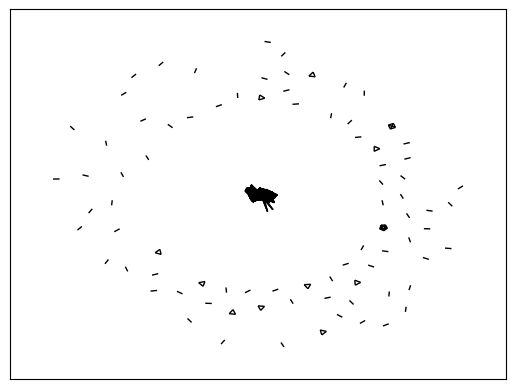

In [9]:
coupling = scripts.fca.fca.find_coupled_reactions(tmodel)
tmodel = scripts.fca.fca.collapse_coupled_reactions(tmodel, coupling)

In [35]:
print(tmodel.reactions.DMPPS.metabolites)

{<ThermoMetabolite h2mb4p_c at 0x772ea105d390>: -1, <ThermoMetabolite nadh_c at 0x772ea8f845d0>: -1, <ThermoMetabolite dmpp_c at 0x772e9a1dd390>: 1, <ThermoMetabolite h2o_c at 0x772eaa03eb50>: 1, <ThermoMetabolite nad_c at 0x772eaa09ac10>: 1, <ThermoMetabolite h_c at 0x772eb5443fd0>: -1.0}


In [3]:
def clean_reaction_stoichiometry(model, tolerance=1e-9):
    """
    Cleans up floating-point noise in reaction stoichiometry.
    """
    for rxn in model.reactions:
        # 1. Identify metabolites to change
        updates = {}
        to_remove = []
        
        for met, coeff in rxn.metabolites.items():
            # If the coefficient is extremely small, mark for removal
            if abs(coeff) < tolerance:
                to_remove.append(met)
            # If it's very close to an integer, round it
            elif abs(coeff - round(coeff)) < tolerance:
                updates[met] = round(coeff) - coeff
        
        # 2. Apply updates (add_metabolites adjusts existing coeffs)
        if updates:
            rxn.add_metabolites(updates)
            
        # 3. Remove metabolites that should be zero
        if to_remove:
            # Setting a coefficient to 0 in COBRApy requires removing/re-adding 
            # or using the internal dict. This is the safest way:
            for met in to_remove:
                # Add the negative of current coeff to bring it to zero
                rxn.add_metabolites({met: -rxn.get_coefficient(met)})

    return model

In [1]:
importlib.reload(scripts.fca.fca)
importlib.reload(scripts.gen_model)
importlib.reload(scripts.reaction_utils)

def gen_model_new(condition, balance_charge=True, flux_limit = 100):

    tmodel = scripts.gen_model.gen_model(MODEL_NAME, INPUT_MODEL, INPUT_KEGGS, INPUT_REED, INPUT_INCHI, INPUT_GAMS, "", True, True, True)
    tmodel = scripts.gen_model.apply_physio_data(tmodel, condition, INPUT_EXP_DATA, INPUT_EXP_CONC, INPUT_METABOLOMICS, INPUT_GAMS, RELAX_EXP_FLUX_BOUNDS, INCLUDE_CO2, INCLUDE_O2, allow_other_excr=False, output_log="", flux_limit=flux_limit)

    print(tmodel.reactions.DMPPS.metabolites)

    blocked_p = scripts.reaction_utils.list_blocked_reactions(tmodel, "core", "", 1, False)
    print(len(blocked_p))
    tmodel.remove_reactions(blocked_p, remove_orphans=True)
    scripts.metabolite_utils.remove_orphan_metabolites(tmodel)

    tmodel = scripts.fca.fca.compress_model_full(tmodel, remove_cofactor_loops=True)

    blocked_p = scripts.reaction_utils.list_blocked_reactions(tmodel, "core", "", 1, False)
    print(len(blocked_p))
    tmodel.remove_reactions(blocked_p, remove_orphans=True)
    scripts.metabolite_utils.remove_orphan_metabolites(tmodel)

    tmodel.remove_reactions(["2DGULRx"], remove_orphans=True)

    for rxn in tmodel.reactions:
        print(rxn.id, rxn)
        reaction_balance(rxn, balance_charge=balance_charge, balance_mg=False)

    clean_reaction_stoichiometry(tmodel)

    tmodel.update_thermo_info(fit_unknown_dfG0=True)

    for x in tmodel.reactions:
        print(x)

    scripts.metabolite_utils.apply_met_tva(tmodel, "results/WT_Glc_Reduced/ecoli_WT_Glc_mets.mps.gz_objval.txt")

    for r in tmodel.reactions:
        r.lower_bound = float(r.lower_bound)
        r.upper_bound = float(r.upper_bound)

    return tmodel
    #for m in tmodel.metabolites:
    #    m.lower_bound = float(m.lower_bound)
    #    m.upper_bound = float(m.upper_bound)

    # Remove futile loops?
    # tmodel.remove_reactions(["DKGLCNR1", "2DGULRy", "2DGULRx", "DKGLCNR2y", "DKGLCNR2x", "IDOND", "IDOND2"], remove_orphans=True)
    # scripts.metabolite_utils.remove_orphan_metabolites(tmodel)

    #tmodel.update_thermo_info(fit_unknown_dfG0=True)


NameError: name 'importlib' is not defined

In [43]:
tmodel.reactions.ATPS4r
#tmodel.reactions.ATPHYD

Reaction identifier,ATPS4r
Name,
Memory address,0x79052cab1990
Stoichiometry,adp_c + 4.0 charge_e + 4.0 h_e + pi_c <=> atp_c + 4.0 charge_c + h2o_c + 3.0 h_c adp_c + 4.0 charge_e + 4.0 h_e + pi_c <=> atp_c + 4.0 charge_c + h2o_c + 3.0 h_c
GPR,
Lower bound,-100.0
Upper bound,100.0


['Parameters', 'Exchange reactions', 'Reactions', 'Biomass Composition', 'Transmembrane reactions', 'Metabolites', 'references', 'Transmembrane_reactions_reed', 'Transmembrane reactions_Orth', 'Transmembrane reactions old', 'Sheet3', 'log', 'subsystems']
*** Reading data from Reactions ***
unknown metabolite '2dhglcn[c]' created
unknown metabolite 'nadh[c]' created
unknown metabolite 'glcn[c]' created
unknown metabolite 'nad[c]' created
unknown metabolite 'nadph[c]' created
unknown metabolite 'nadp[c]' created
unknown metabolite '2dhguln[c]' created
unknown metabolite 'idon-L[c]' created
unknown metabolite '3hcinnm[c]' created
unknown metabolite 'o2[c]' created
unknown metabolite 'dhcinnm[c]' created
unknown metabolite 'h2o[c]' created
unknown metabolite '3hpppn[c]' created
unknown metabolite 'dhpppn[c]' created
unknown metabolite 'phthr[c]' created
unknown metabolite '4hthr[c]' created
unknown metabolite 'pi[c]' created
unknown metabolite '5dglcn[c]' created
unknown metabolite 'ru5p-D

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


23dhba_c NOTHING DONE!
hkntd_c NOTHING DONE!
23dhdp_c NOTHING DONE!
thdp_c NOTHING DONE!
dhf_c NOTHING DONE!
dhpt_c NOTHING DONE!
dhna_c NOTHING DONE!
octdp_c NOTHING DONE!
dhnpt_c NOTHING DONE!
6hmhpt_c NOTHING DONE!
gcald_c NOTHING DONE!
dhor-S_c NOTHING DONE!
orot_c NOTHING DONE!
cechddd_c NOTHING DONE!
25drapp_c NOTHING DONE!
6hmhptpp_c NOTHING DONE!
dhptd_c NOTHING DONE!
hmfurn_c NOTHING DONE!
3dhq_c NOTHING DONE!
3dhsk_c NOTHING DONE!
25dkglcn_c NOTHING DONE!
dkmpp_c NOTHING DONE!
2kmb_c NOTHING DONE!
dmpp_c NOTHING DONE!
ipdp_c NOTHING DONE!
grdp_c NOTHING DONE!
h2mb4p_c NOTHING DONE!
2omhmbl_c NOTHING DONE!
dmso_c NOTHING DONE!
dms_c NOTHING DONE!
2dmmql8_c NOTHING DONE!
dhpmp_c NOTHING DONE!
ahdt_c NOTHING DONE!
23doguln_c NOTHING DONE!
3dhguln_c NOTHING DONE!
dpcoa_c NOTHING DONE!
2dhp_c NOTHING DONE!
pant-R_c NOTHING DONE!
2dr5p_c NOTHING DONE!
dtmp_c NOTHING DONE!
dump_c NOTHING DONE!
2dr1p_c NOTHING DONE!
dxyl5p_c NOTHING DONE!
2me4p_c NOTHING DONE!
dxyl_c NOTHING DONE!
4p

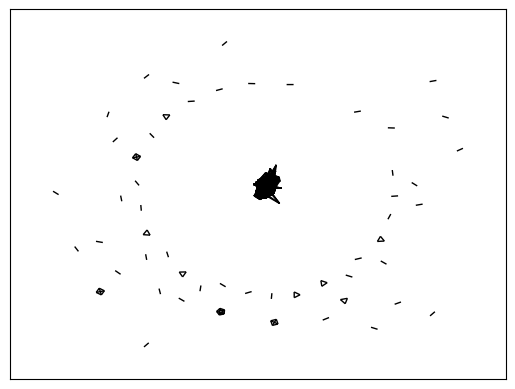

In [ ]:
tmodel_tfs = gen_model_new(CONDITIONS_TO_REGRESS[0], False)

In [49]:
cobra.io.write_sbml_model(tmodel_tfs, "tfs/reduced/WT_Glc/testing/ecoli.sbml")

In [30]:
importlib.reload(scripts.gen_model)
scripts.gen_model.prepare_tfs_files(tmodel, "ecoli", "WT_Glc", "tfs/reduced/WT_Glc", True)

In [35]:
import scripts.tfs.preprocess
import scripts.tfs.thermospace_mod
import scripts.tfs.tbasis_mod
import glob

importlib.reload(scripts.tfs.preprocess)
importlib.reload(scripts.tfs.thermospace_mod)
importlib.reload(scripts.tfs.tbasis_mod)

def tfs_preprocess(tfs_dir, ranktol = 1e-5):

    tfs_files_dir = glob.glob(f"{tfs_dir}/*.*")
    print(tfs_files_dir)
    model_file = [x for x in tfs_files_dir if x.endswith(".sbml")][0]
    vbounds = [x for x in tfs_files_dir if x.endswith("vbounds.csv")][0]
    lcv = [x for x in tfs_files_dir if x.endswith("lcv.csv")][0]
    lcm = [x for x in tfs_files_dir if x.endswith("lcm.csv")][0]
    lcb = [x for x in tfs_files_dir if x.endswith("lcb.csv")][0]
    drg0pm = [x for x in tfs_files_dir if x.endswith("drg0pm.csv")][0]
    drg0cs = [x for x in tfs_files_dir if x.endswith("drg0cs.csv")][0]

    prep = scripts.tfs.preprocess.Preprocess(
        cobra_file=model_file,
        vbound_file=vbounds,
        logconcmean_file=lcm,
        logconcvar_file=lcv,
        lncbounds_file=lcb,
        drG0file=drg0pm,
        drGcovsqrtfile=drg0cs,
        drG0covfile=None#"tfs/drg0c_test.csv",
    )

    thermodynamic_space = scripts.tfs.thermospace_mod.ThermodynamicSpaceMod(
        prep.Sconstrained,
        prep.rid_constrained,
        prep.model.metabolites,
        prep.drg0_prime_mean,
        prep.drg0_prime_cov_sqrt,
        prep.log_conc_cov,
        prep.log_conc_mean,
    )


    tbasis = scripts.tfs.tbasis_mod.ThermodynamicSpaceBasismod(
        thermodynamic_space,
        explicit_log_conc=True,
        explicit_drg0=True,
        explicit_drg=True,
        min_eigenvalue=1e-10,
        ranktol=ranktol,
        #ignoreconc_met_idx=prep.ignoreconc_met_idx,
    )

    return (prep, thermodynamic_space, tbasis)


In [36]:
tfs_data = tfs_preprocess("tfs/reduced/WT_Glc/")

ERROR:cobra.io.sbml:No objective coefficients in model. Unclear what should be optimized


['tfs/reduced/WT_Glc/ecoli_WT_Glc_vbounds.csv', 'tfs/reduced/WT_Glc/ecoli_WT_Glc_lcb.csv', 'tfs/reduced/WT_Glc/ecoli_WT_Glc_drg0cs.csv', 'tfs/reduced/WT_Glc/ecoli_WT_Glc_drg0pm.csv', 'tfs/reduced/WT_Glc/ecoli_WT_Glc_lcm.csv', 'tfs/reduced/WT_Glc/ecoli_WT_Glc_lcv.csv', 'tfs/reduced/WT_Glc/ecoli_WT_Glc.sbml']
389
[]
[385, 289, 384, 283, 282, 291, 388, 333, 290, 288, 284, 286, 285, 287]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 14

In [38]:
import pta
problem = pta.PmoProblem(tfs_data[0].model, tfs_data[1], tfs_data[2], solver="GUROBI")

In [39]:
problem.solve(verbose=True)

(CVXPY) Jan 15 04:03:10 PM: Your problem has 1166 variables, 2534 constraints, and 0 parameters.
(CVXPY) Jan 15 04:03:10 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 15 04:03:10 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 15 04:03:10 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 15 04:03:10 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Jan 15 04:03:10 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Jan 15 04:03:10 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> GUROBI
(CVXPY) Jan 15 04:03:10 PM: Applying reduction Dcp2Cone
(CVXPY) Jan 15 04:03:10 PM: Applying reduction CvxAttr2Constr
(CVXPY) Jan 15 04:03:10 PM: Applying reduction ConeMatrixStuffing


                                     CVXPY                                     
                                     v1.7.3                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------


(CVXPY) Jan 15 04:03:10 PM: Applying reduction GUROBI
(CVXPY) Jan 15 04:03:10 PM: Finished problem compilation (took 2.327e-01 seconds).
(CVXPY) Jan 15 04:03:10 PM: Invoking solver GUROBI  to obtain a solution.


-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
Set parameter OutputFlag to value 1
Set parameter QCPDual to value 1
Set parameter IntFeasTol to value 1e-09
Set parameter FeasibilityTol to value 1e-09
Set parameter BarQCPConvTol to value 1e-08
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: AMD Ryzen 7 7800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Non-default parameters:
FeasibilityTol  1e-09
IntFeasTol  1e-09
BarQCPConvTol  1e-08
QCPDual  1
GURO_PAR_DUMP  1

Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Optimize a model with 3342 rows, 1976 columns and 180005 nonzeros
Model fingerprint: 0x92210ae2
Model has 2 

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
(CVXPY) Jan 15 04:47:12 PM: Problem status: infeasible_inaccurate
(CVXPY) Jan 15 04:47:12 PM: Optimal value: inf
(CVXPY) Jan 15 04:47:12 PM: Compilation took 2.327e-01 seconds
(CVXPY) Jan 15 04:47:12 PM: Solver (including time spent in interface) took 2.642e+03 seconds


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------


'infeasible_inaccurate'

In [9]:
unknowns = []
knowns = []
for m in tmodel.metabolites:
    print(m.id, m._unknown)
    if m.unknown:
        unknowns.append(m)
    if not m._unknown:
        knowns.append(m)
for m in unknowns:
    print(m.id, m.dfG0)
for m in knowns:
    print(m.id, m.dfG0)

nadh_c False
glcn_c False
nad_c False
nadph_c False
nadp_c False
o2_c False
h2o_c False
pi_c False
ru5p-D_c False
ACP_c True
atp_c False
ttdca_c False
amp_c False
myrsACP_c True
ppi_c False
ttdcea_c True
tdeACP_c True
hdca_c False
palmACP_c True
hdcea_c False
hdeACP_c True
ocdcea_c False
octeACP_c True
g6p_c False
4abut_c False
akg_c False
glu-L_c False
accoa_c False
ac_c False
coa_c False
acald_c False
gtp_c False
co2tot_c False
adp_c False
ppa_c False
ppcoa_c False
ump_c False
2obut_c False
pyr_c False
udp_c False
acACP_c True
orn_c False
cit_c False
icit_c False
acg5sa_c False
adn_c False
ins_c False
nh3_c False
gln-L_c False
ade_c False
hxan_c False
gdp_c False
gmp_c False
prpp_c False
fum_c False
asp-L_c False
imp_c False
gam6p_c False
ptrc_c False
10fthf_c False
thf_c False
ala-D_c False
ala-L_c False
pydx5p_c False
pyam5p_c False
glyc_c False
malt_c False
glc-D_c False
maltttr_c False
maltpt_c True
malthx_c False
malthp_c True
2dmmq8_c True
mqn8_c True
for_c False
r5p_c False
ar

In [9]:
tmodel.remove_reactions(["2DGULRx"], remove_orphans=True)

In [8]:
print(tmodel.reactions.get_by_id("2DGLCNRx"))

KeyError: '2DGLCNRx'

In [6]:
tmodel.objective = tmodel.reactions.biomass_EX
tmodel.optimize()

,fluxes,reduced_costs
A5PISO,0.029479,0.0
AACPS1,0.005896,0.0
AACPS2,-0.009507,-0.0
AACPS3,0.000000,0.0
ABTA,-0.271752,-0.0
...,...,...
biomass_ce,0.701880,0.0
biomass_EX,0.701880,2.0
OROTex,0.000000,0.0
DCTA,0.355406,0.0


In [16]:
tmodel.m = None
tmodel.m.Params.TimeLimit = 1800
tmodel.objective = tmodel.reactions.biomass_EX
tmodel.add_TFBA_variables()

tmodel.m.Params.TimeLimit = 500
tmodel.m.optimize()


Set parameter TimeLimit to value 1800
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
Set parameter TimeLimit to value 500
Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: AMD Ryzen 7 7800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Non-default parameters:
TimeLimit  500
NonConvex  2
GURO_PAR_DUMP  1

Academic license 2731723 - for non-commercial use only - registered to l.___@student.rug.nl
Optimize a model with 3927 rows, 3183 columns and 63701 nonzeros
Model fingerprint: 0x112313e7
Model has 1 simple general constraint
  1 NORM
Variable types: 2794 continuous, 389 integer (389 binary)
Coefficient statistics:
  Matrix range     [3e-06, 3e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [3e-01, 1e+06]
  RHS range        [4e-14, 1e+05]
         Consider reformulating model or setting NumericFocus parameter
         t

In [22]:
importlib.reload(scripts.reaction_utils)
importlib.reload(scripts.fca.fca)

<module 'scripts.fca.fca' from '/home/laurens/MSC-Thermo/scripts/fca/fca.py'>

In [23]:
met_res = scripts.reaction_utils.tfva_run_scenarios_one_model_mets(tmodel, "ecoli", "WT_Glc", "reduction", "", False, False, ONLY_WRITE=True)

[]
0
0
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
Set parameter TimeLimit to value 99999
Set parameter MIPGap to value 0.001
Added nadh_c : <MVar ()>
array(<gurobi.Var ln_conc[0,0]>)
Added glcn_c : <MVar ()>
array(<gurobi.Var ln_conc[0,1]>)
Added nad_c : <MVar ()>
array(<gurobi.Var ln_conc[0,2]>)
Added nadph_c : <MVar ()>
array(<gurobi.Var ln_conc[0,3]>)
Added nadp_c : <MVar ()>
array(<gurobi.Var ln_conc[0,4]>)
Added o2_c : <MVar ()>
array(<gurobi.Var ln_conc[0,5]>)
Added h2o_c : <MVar ()>
array(<gurobi.Var ln_conc[0,6]>)
Added pi_c : <MVar ()>
array(<gurobi.Var ln_conc[0,7]>)
Added ru5p-D_c : <MVar ()>
array(<gurobi.Var ln_conc[0,8]>)
Added ACP_c : <MVar ()>
array(<gurobi.Var ln_conc[0,9]>)
Added atp_c : <MVar ()>
array(<gurobi.Var ln_conc[0,10]>)
Added ttdca_c : <MVar ()>
array(<gurobi.Var ln_conc[0,11]>)
Added amp_c : <MVar ()>
array(<gurobi.Var ln_conc[0,12]>)
Added myrsACP_c : <MVar ()>
array(<gurobi.Var ln_conc[0,13]>)
Added ppi_c : <MVar ()>
array(<gu

In [26]:
for r in tmodel.reactions:
    print(r)

2DGLCNRx: nadh_c + nadp_c <=> nad_c + nadph_c
2DGULRx: 2dhguln_c + h_c + nadh_c <=> idon-L_c + nad_c
2DGULRy: 2dhguln_c + h_c + nadph_c <=> idon-L_c + nadp_c
A5PISO: 13.859738095241825 10fthf_c + 0.1666666666668321 2kmb_c + 6.5714285714330885 2obut_c + 11.904761904768652 accoa_c + 4.999000000025396 actACP_c + 1.314285714286736 ala-D_c + 0.6571428571433905 ala-L_c + 11.718285714288387 asp-L_c + 8.419047619053154 aspsa_c + 89.0171190476508 atp_c + 1.001404761905369 ctp_c + 3.4775952380980484 cys-L_c + 0.5880952380956701 dump_c + 9.785714285720896 e4p_c + 11.716880952383072 fgam_c + 1.7142857142861976 gam6p_c + 28.052809523816837 gln-L_c + 8.594809523825827 glu-L_c + 11.71688095238293 gly_c + 6.739738095243785 gtp_c + 57.451880952392756 h2o_c + 3.47619047619278 hom-L_c + 31.69650000017205 malACP_c + 5.25616666667035 mlthf_c + 0.20000000000001625 myrsACP_c + 14.119047619056824 nad_c + 132.2159285718419 nadph_c + 7.502380952389207 orot_c + 0.007999999999999783 peEC_c + 21.22857142858519 pep

In [56]:
def tighten_and_skip_tfva(model, threshold=99):
    # 1. Run regular FVA
    fva_res = cobra.flux_analysis.flux_variability_analysis(model)
    
    easy_rxns = []
    difficult_rxns = []
    
    for rxn_id, row in fva_res.iterrows():
        # If the reaction already hits the max/min capacity in regular FBA
        if row['maximum'] >= threshold and row['minimum'] <= -threshold:
            # These are 'Full Capacity' reactions
            easy_rxns.append(rxn_id)
        else:
            difficult_rxns.append(rxn_id)
            
    return easy_rxns, difficult_rxns

In [11]:
groups = tighten_and_skip_tfva(tmodel)
for x in groups[0]:
    print(x)

print("----")

for x in groups[1]:
    print(x)

AACPS1
AACPS3
ABTA
ABUTD
ACALDi
ACCOACr
ACCOAL
ACGK
ACKr
ACOATA
ACODA
ACONT
ACS
ADA
ADD
ADK1
ADK3
ADNK1
ADPT
ADSL1r
ALAR
ALATAD2
ALATAL
ALATAL2
ALDD2x
AMALT1
AMALT2
AMALT3
AMALT4
AMPN
ARGSL
ASAD
ASNN
ASNS1
ASNS2
ASPO3
ASPO4
ASPO5
ASPO6
ASPT
ASPTA
AST
C140SN
C160SN
CBMK
CBPS
CDAPPAEC
CITL
CMPN
CS
CTPS2
CYSS
cytd
CYTDK2
CYTK1
CYTK2
DAAD
DADA
DADK
DAGKEC
DASYNEC
DCTPD
DCYTD
DGK1
DHAPT
DHORD2
DHORD5
DMSOR1
DRPA
DTMPK
DURIK1
DURIPP
DUTPDP
EDA
ENO
ETHAAL
F6PA
FAO1
FAO2
FBA
FBP
FRD2
FRD3
FRUK
FTHFD
fum
G1PP
G3PD2
G3PD6
G3PD7
G5SADs
G5SD
G6PDA
G6PDH2r
GALU
GARFT
GART
GF6PTA
GHMT2
GK1
GLNS
GLUDC
GLUDy
GLUN
GLUSy
GLXCL
GLYATi
GLYCDx
GLYCL
GLYCLTDx
GLYCTO2
GLYCTO3
GLYCTO4
GLYK
GLYOX
GMPR
GMPS2
GND
GPDDA4
GSNK
GSPMDA
GUAD
GUAPRT
HEX1
HPYRI
HSDy
HSK
HXPRT
HYPOE
ICDHyr
ICL
IMPD
INSK
KAS14
KAS15
L-LACD2
LPLIPA1
LPLIPA2
LPLIPA3
LPLIPA4
LPLIPA6
MACPD
MALS
MCITD
MDH
MDH3
ME1
MLTG3
MLTG4
MLTG5
MLTP1
MLTP2
MLTP3
MMCD
MTHFC
NACODA
NADDP
NADH10
NADH5
NADH9
NADK
NADPPPS
NADS1
NAMNPP
NDPK1
NDPK2
NDPK3
NDPK5
N

['Parameters', 'Exchange reactions', 'Reactions', 'Biomass Composition', 'Transmembrane reactions', 'Metabolites', 'references', 'Transmembrane_reactions_reed', 'Transmembrane reactions_Orth', 'Transmembrane reactions old', 'Sheet3', 'log', 'subsystems']
*** Reading data from Reactions ***
unknown metabolite '2dhglcn[c]' created
unknown metabolite 'nadh[c]' created
unknown metabolite 'glcn[c]' created
unknown metabolite 'nad[c]' created
unknown metabolite 'nadph[c]' created
unknown metabolite 'nadp[c]' created
unknown metabolite '2dhguln[c]' created
unknown metabolite 'idon-L[c]' created
unknown metabolite '3hcinnm[c]' created
unknown metabolite 'o2[c]' created
unknown metabolite 'dhcinnm[c]' created
unknown metabolite 'h2o[c]' created
unknown metabolite '3hpppn[c]' created
unknown metabolite 'dhpppn[c]' created
unknown metabolite 'phthr[c]' created
unknown metabolite '4hthr[c]' created
unknown metabolite 'pi[c]' created
unknown metabolite '5dglcn[c]' created
unknown metabolite 'ru5p-D

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


dhor-S_c NOTHING DONE!
orot_c NOTHING DONE!
cechddd_c NOTHING DONE!
25drapp_c NOTHING DONE!
6hmhptpp_c NOTHING DONE!
dhptd_c NOTHING DONE!
hmfurn_c NOTHING DONE!
3dhq_c NOTHING DONE!
3dhsk_c NOTHING DONE!
25dkglcn_c NOTHING DONE!
dkmpp_c NOTHING DONE!
2kmb_c NOTHING DONE!
dmpp_c NOTHING DONE!
ipdp_c NOTHING DONE!
grdp_c NOTHING DONE!
h2mb4p_c NOTHING DONE!
2omhmbl_c NOTHING DONE!
dmso_c NOTHING DONE!
dms_c NOTHING DONE!
2dmmql8_c NOTHING DONE!
dhpmp_c NOTHING DONE!
ahdt_c NOTHING DONE!
23doguln_c NOTHING DONE!
3dhguln_c NOTHING DONE!
dpcoa_c NOTHING DONE!
2dhp_c NOTHING DONE!
pant-R_c NOTHING DONE!
2dr5p_c NOTHING DONE!
dtmp_c NOTHING DONE!
dump_c NOTHING DONE!
2dr1p_c NOTHING DONE!
dxyl5p_c NOTHING DONE!
2me4p_c NOTHING DONE!
dxyl_c NOTHING DONE!
4per_c NOTHING DONE!
ecaEC_c NOTHING DONE!
udcpdp_c NOTHING DONE!
6pgc_c NOTHING DONE!
kdo2lipid4_c NOTHING DONE!
kdo2lipid4L_c NOTHING DONE!
lipa_c NOTHING DONE!
kdo2lipid4p_c NOTHING DONE!
lipa_cold_c NOTHING DONE!
2pg_c NOTHING DONE!
seram

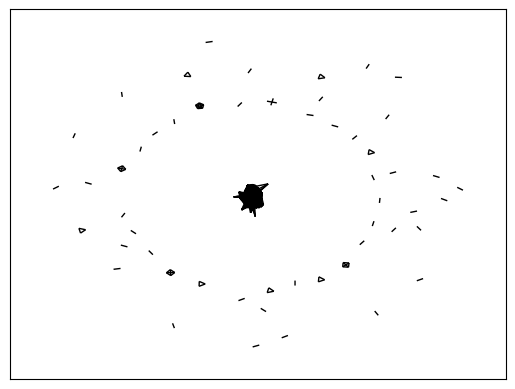

In [12]:
tmodel = gen_model_new(CONDITIONS_TO_REGRESS[0], True, flux_limit=33)

In [68]:
for x in tmodel.reactions:
    print(x.id, x.lower_bound, x.upper_bound)

A5PISO -1.2649703213866887 1.2649703213866887
AACPS1 -25.0 25.0
AACPS2 -2.5000000000002376 2.5000000000002376
AACPS3 -25.0 25.0
ABTA -25.0 25.0
ABUTD -24.99999999999997 24.99999999999997
ACALDi -25.0 25.0
ACCOACr -25.0 25.0
ACCOAL -25.0 25.0
ACGK -24.99999999999998 24.99999999999998
ACKr -25.0 25.0
ACOATA -25.0 25.0
ACODA -25.0 25.0
ACONT -25.0 25.0
ACS -25.0 25.0
ADA -25.0 25.0
ADD -25.0 25.0
ADK1 -25.0 25.0
ADK3 -25.0 25.0
ADNK1 -25.0 25.0
ADPT -25.0 25.0
ADSL1r -25.0 25.0
ALAR -25.0 25.0
ALATAD2 -25.0 25.0
ALATAL -25.0 25.0
ALATAL2 -25.0 25.0
ALDD2x -25.0 25.0
AMALT1 -24.99999999999997 24.99999999999997
AMALT2 -25.0 25.0
AMALT3 -25.0 25.0
AMALT4 -25.0 25.0
AMPN -25.0 25.0
ARGSL -25.0 25.0
ASAD -24.999999999999993 24.999999999999993
ASNN -25.0 25.0
ASNS1 -25.0 25.0
ASNS2 -25.0 25.0
ASPCT -24.99999999999996 24.99999999999996
ASPO3 -25.0 25.0
ASPO4 -25.0 25.0
ASPO5 -25.0 25.0
ASPO6 -25.0 25.0
ASPT -25.0 25.0
ASPTA -25.0 25.0
AST -25.0 25.0
ATPHYD 3.15 25.0
C140SN -25.0 25.0
C160SN -25.

In [62]:
print(reactions)

[<ThermoReaction A5PISO at 0x7904d07c3310>, <ThermoReaction AACPS2 at 0x7904c1bc2210>, <ThermoReaction ASPCT at 0x79059409d510>, <ThermoReaction ATPHYD at 0x7904955bce50>, <ThermoReaction CAT at 0x79049555c750>, <ThermoReaction CLPNSEC at 0x7905949efa10>, <ThermoReaction DKMPPD at 0x79052b28b350>, <ThermoReaction DKMPPD2 at 0x79052b2896d0>, <ThermoReaction GAPD at 0x790510c9d890>, <ThermoReaction GLCP at 0x790510c7a350>, <ThermoReaction GLCS1 at 0x790526289410>, <ThermoReaction GNK at 0x79052c580a10>, <ThermoReaction TALA at 0x7904e91d6d90>, <ThermoReaction TKT1 at 0x7904e91d5890>, <ThermoReaction TKT2 at 0x7904dd52e650>, <ThermoReaction TPI at 0x7904dd518ad0>, <ThermoReaction UNK3 at 0x7904e738ae10>, <ThermoReaction biomass at 0x7904e78cd9d0>, <ThermoReaction EX_ac at 0x7904e73ba450>, <ThermoReaction EX_co2 at 0x7905936e3bd0>, <ThermoReaction EX_glc at 0x790593639090>, <ThermoReaction EX_h at 0x79056d680d90>, <ThermoReaction EX_h2o at 0x79056d680910>, <ThermoReaction EX_nh3 at 0x79056

In [13]:
for r in tmodel.reactions:
    if r.lower_bound < -33:
        r.lower_bound = -33
    if r.upper_bound > 33:
        r.upper_bound = 33

In [8]:
tmodel.objective = tmodel.reactions.biomass_EX
tmodel.optimize()

,fluxes,reduced_costs
A5PISO,0.029479,0.0
AACPS1,0.000429,-0.0
AACPS2,0.000000,-0.0
AACPS3,0.003027,0.0
ABTA,0.000000,0.0
...,...,...
biomass_ce,0.701880,0.0
biomass_EX,0.701880,0.0
OROTex,-32.644594,0.0
DCTA,33.000000,0.0


In [ ]:
importlib.reload(scripts.reaction_utils)

scripts.reaction_utils.tfva_run_scenarios_one_model(tmodel, "ecoli", "WT_Glc_FVA", "reduction/", REMOVE_BLOCKED=False, APPLY_FVA=False, RUN_DIRECTLY=True, ONLY_WRITE=False, mipgap=0.05)

[]
0
0
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
Set parameter TimeLimit to value 99999
Set parameter MIPGap to value 0.05
Set parameter NonConvex to value 2
Set parameter TimeLimit to value 10
Set parameter TimeLimit to value 99999
Set parameter MIPGap to value 0.05
Running reaction: A5PISO: 13.859738095241024 10fthf_c + 6.571428571428421 2obut_c + 11.904761904762198 accoa_c + 4.99900000001281 actACP_c + 1.3142857142859736 ala-D_c + 0.6571428571429069 ala-L_c + 11.71828571428867 asp-L_c + 8.419047619047838 aspsa_c + 89.01711904763705 atp_c + 1.0014047619051376 ctp_c + 3.4775952380967 cys-L_c + 0.06500000000261894 dhap_c + 0.5880952380949245 dump_c + 9.785714285713954 e4p_c + 11.71688095238337 fgam_c + 1.71428571428552 gam6p_c + 28.052809523814144 gln-L_c + 8.428142857138866 glu-L_c + 11.716880952383312 gly_c + 6.739738095239266 gtp_c + 57.38688095237265 h2o_c + 3.476190476191151 hom-L_c + 0.06500000000261894 iasp_c + 31.696500000088207 malACP_c + 5.2561666

In [ ]:
# 

In [12]:
for x in tmodel.reactions:
    print(x)

2DGLCNRx: nadh_c + nadp_c <=> nad_c + nadph_c
2DGULRx: 2dhguln_c + h_c + nadh_c <=> idon-L_c + nad_c
A5PISO: 13.859738095241825 10fthf_c + 0.1666666666668321 2kmb_c + 6.5714285714330885 2obut_c + 11.904761904768652 accoa_c + 4.999000000025396 actACP_c + 1.314285714286736 ala-D_c + 0.6571428571433905 ala-L_c + 11.718285714288387 asp-L_c + 8.419047619053154 aspsa_c + 89.0171190476508 atp_c + 1.001404761905369 ctp_c + 3.4775952380980484 cys-L_c + 0.5880952380956701 dump_c + 9.785714285720896 e4p_c + 11.716880952383072 fgam_c + 1.7142857142861976 gam6p_c + 28.052809523816837 gln-L_c + 8.594809523825823 glu-L_c + 11.71688095238293 gly_c + 6.739738095243785 gtp_c + 57.451880952392735 h2o_c + 3.47619047619278 hom-L_c + 31.696500000172048 malACP_c + 5.25616666667035 mlthf_c + 0.20000000000001625 myrsACP_c + 14.119047619056824 nad_c + 132.2159285718419 nadph_c + 7.502380952389207 orot_c + 0.007999999999999783 peEC_c + 21.22857142858519 pep_c + 0.0061428571431236915 pgEC_c + 22.64783333334593 pr

In [11]:
print(tmodel.reactions.get_by_id("2DGLCNRx"))
print(tmodel.reactions.get_by_id("THD2"))

2DGLCNRx: nadh_c + nadp_c <=> nad_c + nadph_c
THD2: charge_e + h_e + nadh_c + nadp_c <=> charge_c + h_c + nad_c + nadph_c


In [20]:
print(tmodel.reactions.get_by_id("2DGLCNRx"))
print(tmodel.reactions.get_by_id("2DGLCNRy"))

2DGLCNRx: nadh_c + nadp_c <=> nad_c + nadph_c


KeyError: '2DGLCNRy'

In [ ]:
# Run FBA: one to zero and one to non-zero
# Avoid compression of cofactors
# Find all cofactors
    # Filter out
    # Are there any cheating reactions and do they have 0 flux?
    # Remove circular reaction?
    # Output ecoli core tfs for conditions

In [16]:
print(tmodel.metabolites.get_by_id("glcn_c").reactions)

frozenset({<ThermoReaction GNK at 0x7e553586e250>, <ThermoReaction 2DGLCNRy at 0x7e552fbd2dd0>, <ThermoReaction GLCNt2r at 0x7e5535346090>, <ThermoReaction 5DGLCNR at 0x7e5544e4f2d0>, <ThermoReaction 2DGLCNRx at 0x7e5551c2f1d0>})


In [29]:
print(tmodel.reactions.DKGLCNR1)

DKGLCNR1: 25dkglcn_c + h_c + nadph_c <=> 2dhguln_c + nadp_c


In [40]:
reactions = [x for x in tmodel.metabolites.get_by_id("idon-L_c").reactions]
for x in reactions:
    print(x)
print("----")
reactions = [x for x in tmodel.metabolites.get_by_id("2dhguln_c").reactions]
for x in reactions:
    print(x)

2DGULRy: 2dhguln_c + h_c + nadph_c <=> idon-L_c + nadp_c
2DGULRx: 2dhguln_c + h_c + nadh_c <=> idon-L_c + nad_c
IDOND2: 5dglcn_c + h_c + nadph_c <=> idon-L_c + nadp_c
IDOND: 5dglcn_c + h_c + nadh_c <=> idon-L_c + nad_c
----
2DGULRx: 2dhguln_c + h_c + nadh_c <=> idon-L_c + nad_c
DKGLCNR1: 25dkglcn_c + h_c + nadph_c <=> 2dhguln_c + nadp_c
2DGULRy: 2dhguln_c + h_c + nadph_c <=> idon-L_c + nadp_c


In [ ]:
reactions = [x for x in tmodel.metabolites.get_by_id("5dglcn_c").reactions]
for x in reactions:
    print(x)
print("----")
reactions = [x for x in tmodel.metabolites.get_by_id("25dkglcn_c").reactions]
for x in reactions:
    print(x)


IDOND: 5dglcn_c + h_c + nadh_c <=> idon-L_c + nad_c
IDOND2: 5dglcn_c + h_c + nadph_c <=> idon-L_c + nadp_c
DKGLCNR2y: 25dkglcn_c + h_c + nadph_c <=> 5dglcn_c + nadp_c
DKGLCNR2x: 25dkglcn_c + h_c + nadh_c <=> 5dglcn_c + nad_c
----
DKGLCNR2y: 25dkglcn_c + h_c + nadph_c <=> 5dglcn_c + nadp_c
DKGLCNR1: 25dkglcn_c + h_c + nadph_c <=> 2dhguln_c + nadp_c
DKGLCNR2x: 25dkglcn_c + h_c + nadh_c <=> 5dglcn_c + nad_c


In [43]:
tmodel.reactions.TESTNADTRHD

Reaction identifier,TESTNADTRHD
Name,
Memory address,0x7e553f4f84d0
Stoichiometry,nad_c + nadph_c <=> nadh_c + nadp_c nad_c + nadph_c <=> nadh_c + nadp_c
GPR,
Lower bound,-100.0
Upper bound,100.0


In [4]:
def find_cofactor_loops(model):
    # Define groups of cofactors to "ignore" for the core stoichiometry
    cofactor_ids = {
        'nad_c', 'nadh_c', 'nadp_c', 'nadph_c', 
        'q8_c', 'q8h2_c', 'mqn8_c', 'mqn8h2_c', 
        'atp_c', 'adp_c', 'gtp_c', 'gdp_c', 'amp_c',
        'h_c', 'h_e', 'pi_c', 'h2o_c' # Also ignore protons/water
    }
    
    diamond_groups = {}

    for rxn in model.reactions:
        # Ignore boundaries/biomass/exchange/transport
        if rxn.boundary or "biomass" in rxn.id.lower() or len(rxn.metabolites) == 1 or len({m.compartment for m in rxn.metabolites}) > 1:
            continue
            
        core = {}
        for met, coeff in rxn.metabolites.items():
            if met.id not in cofactor_ids:
                core[met.id] = coeff
        
        if not core: continue # Skip reactions made ONLY of cofactors (like THD2)
        
        # Create a stable "signature"
        signature = tuple(sorted(core.items()))
        
        if signature not in diamond_groups:
            diamond_groups[signature] = []
        diamond_groups[signature].append(rxn.id)

    # Return only groups with multiple reactions (the diamonds)
    return {sig: ids for sig, ids in diamond_groups.items() if len(ids) > 1}

In [63]:
def collapse_all_loops(model, cofactor_loop_map):
    for signature, rxn_ids in cofactor_loop_map.items():
        # 1. Pick the first reaction as the 'Representative'
        rep_rxn = model.reactions.get_by_id(rxn_ids[0])
        others = rxn_ids[1:]
        
        print(f"Collapsing cofactor loop: {rxn_ids} -> Rep rxn: {rep_rxn.id}")
        
        for other_id in others:
            other_rxn = model.reactions.get_by_id(other_id)
            
            # 2. Transfer capacity (Bounds)
            # This ensures we don't reduce the maximum possible flux of the pathway
            rep_rxn.lower_bound += other_rxn.lower_bound
            rep_rxn.upper_bound += other_rxn.upper_bound
            
            # 3. Remove the redundant reaction
            model.remove_reactions([other_rxn])
            
        balance = rep_rxn.check_mass_balance()
        if balance: # Should be empty dict {}
            print(f"Warning: {rep_rxn.id} is unbalanced after merge: {balance}")
            
    return model

In [60]:
print(tmodel.reactions.ME1)

ME1: h2o_c + mal-L_c + nad_c <=> co2tot_c + h_c + nadh_c + pyr_c


In [5]:
cofactor_loops = find_cofactor_loops(tmodel)


In [10]:
for x, y in cofactor_loops.items():
    print(x, y)

(('2dhguln_c', -1), ('idon-L_c', 1)) ['2DGULRx', '2DGULRy']
(('25dkglcn_c', -1), ('5dglcn_c', 1)) ['DKGLCNR2x', 'DKGLCNR2y']
(('dhap_c', 1), ('glyc3p_c', -1)) ['G3PD2', 'G3PD5']
(('glx_c', -1), ('glyclt_c', 1)) ['GLYCLTDx', 'GLYCLTDy']
(('glyc-R_c', 1), ('hpyr_c', -1)) ['HPYRRx', 'HPYRRy']
(('5dglcn_c', -1), ('idon-L_c', 1)) ['IDOND', 'IDOND2']
(('lac-D_c', -1), ('pyr_c', 1)) ['LDHD', 'LDHD2']
(('mal-L_c', -1), ('oaa_c', 1)) ['MDH', 'MDH2']
(('co2tot_c', 1), ('mal-L_c', -1), ('pyr_c', 1)) ['ME1', 'ME2']
(('succ_c', 1), ('sucsal_c', -1)) ['SSALx', 'SSALy']


In [22]:
print(tmodel.reactions.get_by_id("GLYCLTDx"))
print(tmodel.reactions.get_by_id("GLYCLTDy"))
#print(tmodel.reactions.get_by_id("DKGLCNR1"))
#print(tmodel.reactions.get_by_id("DKGLCNR2x"))
#print(tmodel.reactions.get_by_id("DKGLCNR2y"))
#print(tmodel.reactions.get_by_id("IDOND"))
#print(tmodel.reactions.get_by_id("IDOND2"))

print(tmodel.metabolites.get_by_id("2dhguln_c").reactions)
print(tmodel.metabolites.get_by_id("25dkglcn_c").reactions)
print(tmodel.metabolites.get_by_id("5dglcn_c").reactions)
print(tmodel.metabolites.get_by_id("idon-L_c").reactions)


GLYCLTDx: glx_c + h_c + nadh_c <=> glyclt_c + nad_c
GLYCLTDy: glx_c + h_c + nadph_c <=> glyclt_c + nadp_c


KeyError: '2dhguln_c'


No orphan metabolites found. 


0

In [24]:
tmodel.update_thermo_info(fit_unknown_dfG0=True)

Identifying compounds...
[████████████████████████████████████████] 259/259 orot_e                      

Estimating dfG0'...
[████████████████████████████████████████] 259/259 orot_e                                                                  

Estimating drG0'...
[████████████████████████████████████████] 402/402 EX_oro                                                                                                      



In [68]:
tmodel = collapse_all_loops(tmodel, cofactor_loops)

In [ ]:
print(tmodel.reactions.get_by_id("2DGULRx"))

KeyError: '2DGULRy'